In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA as sklearn_PCA

In [2]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',
                      header=None)

In [3]:
df_wine

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [4]:
X, y = df_wine.iloc[:,1:], df_wine.iloc[:,0]

In [5]:
X

,1,2,3,4,5,6,7,8,9,10,11,12,13
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [6]:
y

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: 0, Length: 178, dtype: int64

In [7]:
class PCA(object):
    def __init__(self):
        pass
    
    def transform(self, X, n_components):
        self.n_components = n_components
        assert X.shape[1] >= self.n_components
        if isinstance(X, pd.DataFrame):
            X = X.to_numpy()
        
        M = X.mean(axis = 0).tolist()
        X = np.subtract(X, M)
        e_value, e_vector = np.linalg.eig(np.cov(X, rowvar = False))
        idx = np.argsort(e_value)[::-1][:self.n_components]
        
        self.eigen_value_ = [e_value[i] for i in idx]
        self.W_ = [e_vector[:,i] for i in idx]
        
        self.explained_variance_ = np.sum(self.eigen_value_) / np.sum(e_value)

        return np.dot(self.W_, X.T).T 
        

In [8]:
pca = PCA()

In [9]:
reduced = pca.transform(X,2)

In [10]:
pca2 = sklearn_PCA(n_components = 2)

In [11]:
pca2.fit(X)
reduced2 = pca2.transform(X)

In [12]:
print(pca2.components_)
print(pca2.explained_variance_)

[[ 1.65926472e-03 -6.81015556e-04  1.94905742e-04 -4.67130058e-03
   1.78680075e-02  9.89829680e-04  1.56728830e-03 -1.23086662e-04
   6.00607792e-04  2.32714319e-03  1.71380037e-04  7.04931645e-04
   9.99822937e-01]
 [ 1.20340617e-03  2.15498184e-03  4.59369254e-03  2.64503930e-02
   9.99344186e-01  8.77962152e-04 -5.18507284e-05 -1.35447892e-03
   5.00440040e-03  1.51003530e-02 -7.62673115e-04 -3.49536431e-03
  -1.77738095e-02]]
[99201.78951748   172.53526648]


In [13]:
print(pca.W_)
print(pca.eigen_value_)

[array([-1.65926472e-03,  6.81015556e-04, -1.94905742e-04,  4.67130058e-03,
       -1.78680075e-02, -9.89829680e-04, -1.56728830e-03,  1.23086662e-04,
       -6.00607792e-04, -2.32714319e-03, -1.71380037e-04, -7.04931645e-04,
       -9.99822937e-01]), array([-1.20340617e-03, -2.15498184e-03, -4.59369254e-03, -2.64503930e-02,
       -9.99344186e-01, -8.77962152e-04,  5.18507284e-05,  1.35447892e-03,
       -5.00440040e-03, -1.51003530e-02,  7.62673115e-04,  3.49536431e-03,
        1.77738095e-02])]
[99201.78951748098, 172.5352664778913]


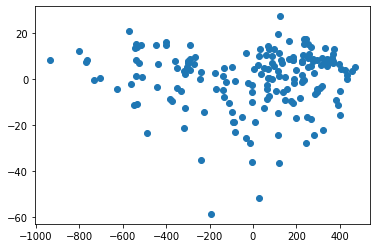

In [14]:
plt.scatter(reduced[:,0],reduced[:,1])

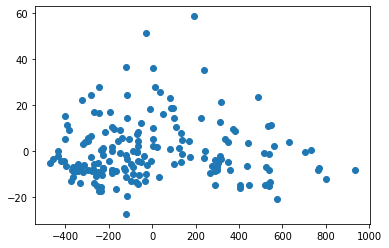

In [18]:
plt.scatter(reduced2[:,0],reduced2[:,1])

In [21]:
abs(np.round(reduced,2)) == abs(np.round(reduced2,2))

array([[ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ Tr